

# Project: Investigate TMDb_Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.



● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.



### Question(s) for Analysis
1-Which genres are most popular from year to year?

2-What genres are most popular over time?

3- is there relation between runtime and budget ?

4-What kinds of properties are associated with movies that have high revenues?



In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**



In [3]:
# Load your data and print it
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# display some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# display some statistics about data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Obsevations
 
 - the mean of budget is 1.462570e+07$
 
 - max budget is 4.250000e+08$
 
 - there is a mistake some of movies in the database have zero budget or zero revenue that is there value has not been recorded



### Data Cleaning
 

> Remove the duplicates in the rows(if any).

In [6]:
#display number of duplicated
print(df.duplicated().sum())

#remove duplicates
df.drop_duplicates(inplace=True)

#display number of duplicated
print(df.duplicated().sum())

1
0


> Removing Unused columns

In [7]:
# create a list of unused cloumns
delete_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count']

#delete unused columns
df= df.drop(delete_col,1)

#display data after delete unused cloumns
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,7.3,2015


> replace zeros in budget, revenue and runtime into null 

In [8]:
#display null values
df.isnull().sum()

budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
vote_average         0
release_year         0
dtype: int64

In [9]:
#list of revenue, budget and runtime column
lists=['budget', 'revenue', 'runtime']

#replace all the value from '0' to NAN in the list
df[lists] = df[lists].replace(0, np.NAN)

#display null values
df.isnull().sum()

budget            5696
revenue           6016
original_title       0
cast                76
director            44
tagline           2824
runtime             31
genres              23
release_date         0
vote_average         0
release_year         0
dtype: int64

> remove null values

In [10]:
#drop null values
df.dropna(inplace = True)

#display null values
df.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
dtype: int64

> Changing some date types column

In [11]:
#display data types of column
df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime           float64
genres             object
release_date       object
vote_average      float64
release_year        int64
dtype: object

In [12]:
#change data type of release_data 
df.release_date = pd.to_datetime(df['release_date'])

#display the date
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,7.3,2015


In [13]:
# change data type of budget and revenue to int
columns = ['budget', 'revenue']
for c in columns:
    df[c] = df[c].astype(int)

#display the data
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,7.3,2015


In [14]:
df_cast= (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_genren= (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
        
df_genren.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [15]:
df = df.join([df_cast, df_genren])

In [16]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,...,cast_1,cast_2,cast_3,cast_4,cast_5,genres_1,genres_2,genres_3,genres_4,genres_5
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,6.3,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,7.3,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None


In [17]:
drops = ['cast','genres']
df = df.drop(drops,1)
df.head()

,budget,revenue,original_title,director,tagline,runtime,release_date,vote_average,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genres_1,genres_2,genres_3,genres_4,genres_5
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124.0,2015-06-09,6.5,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120.0,2015-05-13,7.1,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,119.0,2015-03-18,6.3,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136.0,2015-12-15,7.5,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,137.0,2015-04-01,7.3,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None


In [18]:
#display data types of data
df.dtypes

budget                     int64
revenue                    int64
original_title            object
director                  object
tagline                   object
runtime                  float64
release_date      datetime64[ns]
vote_average             float64
release_year               int64
cast_1                    object
cast_2                    object
cast_3                    object
cast_4                    object
cast_5                    object
genres_1                  object
genres_2                  object
genres_3                  object
genres_4                  object
genres_5                  object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

 





###  a general look on the data

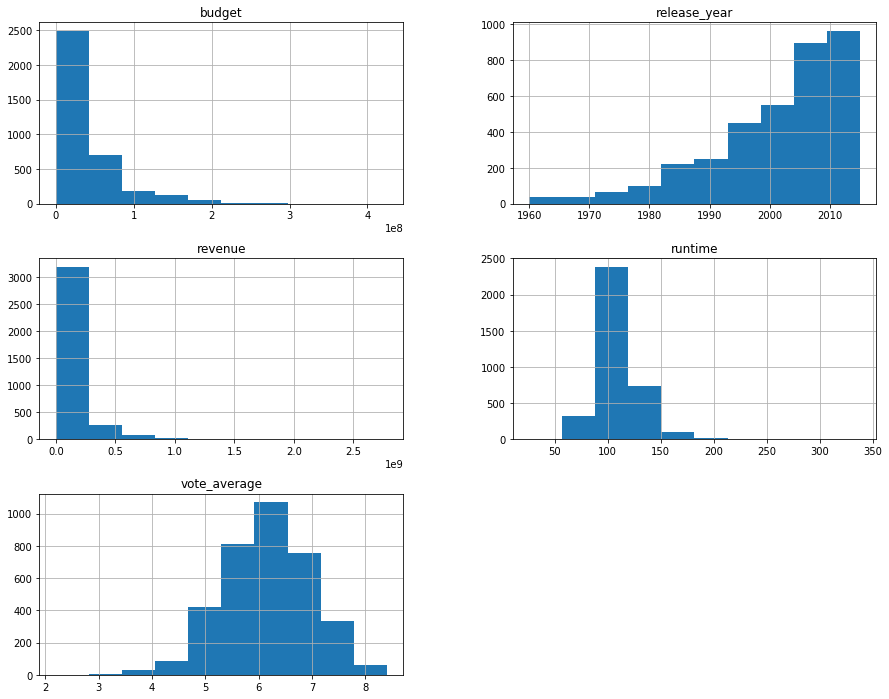

In [40]:
#diplay general look
df.hist(figsize= (15,12));

- most vote_average = 6.5
- The movie release count has increased over time

### Research Question 1-  Which genres are most popular from year to year?

In [41]:
#creates an array of years 
years = df['release_year'].unique()

#creates a list of tuples for most common genres in specific years
most_popular = [] 

#for loop to create most_popular list
for year in years:
    x = df[df['release_year'] == year]
    most = x['genres_1'].value_counts().idxmax()
    most_popular.append((year,most))

#creates dataframw for list of most_popular genre
df_most_popular = pd.DataFrame(most_popular,columns=['release_year','popular_produced_genre']).sort_values('release_year')
df_most_popular 

,release_year,popular_produced_genre
44,1960,Action
43,1961,Comedy
39,1962,Western
48,1963,Action
40,1964,Drama
52,1965,Drama
55,1966,Action
47,1967,Crime
36,1968,Drama
53,1969,Adventure


### Research Question 2-  Which genres are most popular over time ?

In [42]:
#over time most popular genres
overtime_popular = df['genres_1'].value_counts()
overtime_popular

Drama              784
Comedy             724
Action             667
Adventure          298
Horror             269
Crime              156
Thriller           150
Fantasy            105
Animation          100
Science Fiction     96
Romance             58
Family              37
Mystery             33
Documentary         24
Music               23
War                 19
Western             14
History             14
TV Movie             1
Name: genres_1, dtype: int64

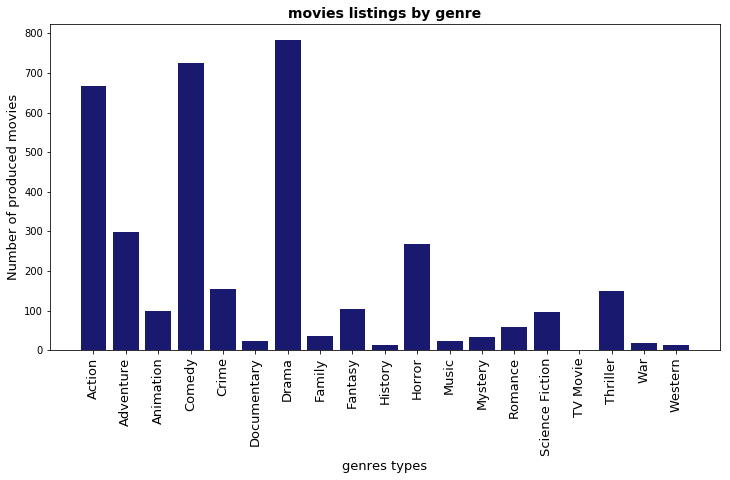

In [43]:
dff = pd.DataFrame(overtime_popular)

index_list = dff.index.tolist()
frq_name_list = dff["genres_1"].tolist()
fig = plt.figure(figsize =(12, 6))
plt.bar(index_list, frq_name_list,color = "midnightblue")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("Number of produced movies", fontsize =13 )
plt.xlabel("genres types", fontsize =13)
plt.title("movies listings by genre",fontsize =14, fontweight = "bold")
plt.show()

> most popular genre is drama 

> the least popular is tv shows

### Research Question  3-ih there relation between runtime and budget ?

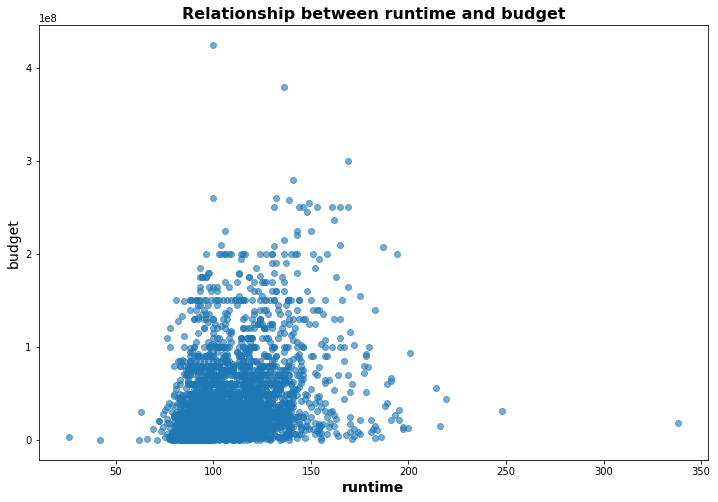

In [44]:
plt.figure (figsize = (12,8))
scatter=plt.scatter(df["runtime"],
           df["budget"],
           alpha = 0.6)
plt.title("Relationship between runtime and budget",
          fontsize = 16,
         weight = "bold")
plt.xlabel("runtime",
           weight = "bold",fontsize = 14)
plt.ylabel("budget",fontsize = 14)
plt.show()

>there is no realation between runtime and budget 

### Research Question 4-  revenue over years 

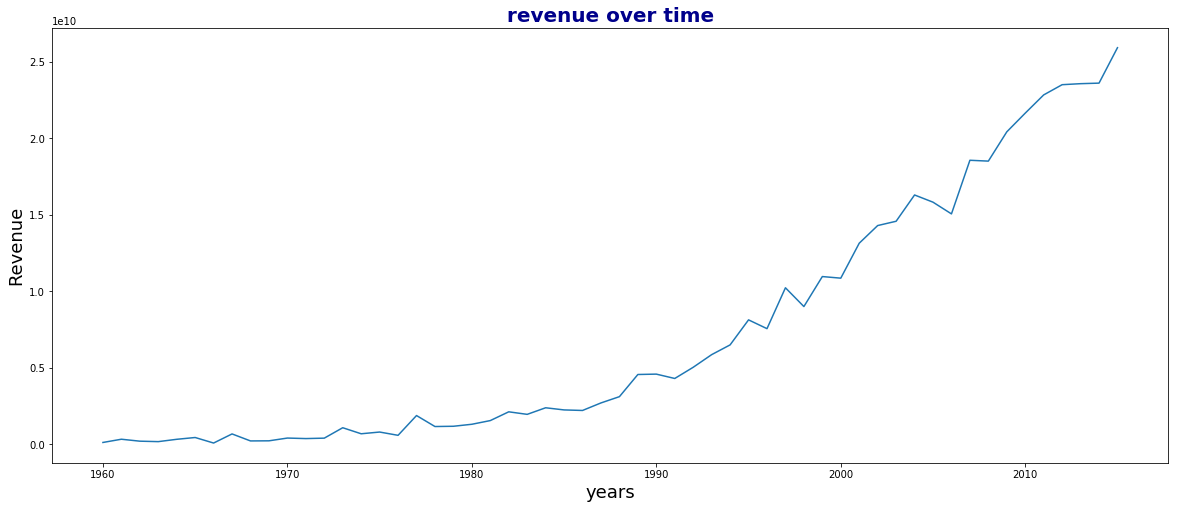

In [45]:
revenue_year = df.groupby('release_year')['revenue'].sum()
plt.figure(figsize = (20,8))
plt.plot(revenue_year)
plt.title("revenue over time", fontsize = 20, fontweight = "bold", color = "darkblue")
plt.ylabel("Revenue",fontsize = 18)
plt.xlabel("years",fontsize = 18)
plt.show()

> there is a big raise at revenue after 2000  

### Research Question  4-What kinds of properties are associated with movies that have high revenues?


In [46]:
high_revenues = df[df['revenue'] >= df['revenue'].mean() ]

In [47]:
def ave(column):
    return high_revenues[column].value_counts().head()

In [48]:
#most popular dicrectors
ave("director")

Steven Spielberg    22
Robert Zemeckis     11
Michael Bay         10
Tony Scott          10
Ridley Scott         9
Name: director, dtype: int64

In [49]:
#most popular actors
ave("cast_1")

Tom Cruise            24
Tom Hanks             20
Adam Sandler          17
Sylvester Stallone    17
Denzel Washington     14
Name: cast_1, dtype: int64

In [50]:
#average time
int(high_revenues['runtime'].mean())

115

<a id='conclusions'></a>
## Conclusions

> for making a successful movie 
- Average run time must be 115 min
- you cast should be include on of (Tom Cruise, Tom Hanks Sylvester, Stallone , Adam Sandler, Bruce Willis)
- genre must be one of (Drama, Comedy, Action, Adventure, Horror)
- director must be one of (Steven Spielberg, Robert Zemeckis, Tony Scott, Michael Bay, Tim Burton)



### Limitations
> This analysis was done considering the movies which had a significant amount of revenue of higher than average.

>This analysis did not take into account the inflation of the currency over time



In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0